In [1]:
from k6221 import *

In [2]:
rm = pyvisa.ResourceManager()
x = None

In [3]:
address = "TCPIP::10.0.4.138::1394::SOCKET"
dev = Keithley6221(address=address, rm=rm)

In [4]:
print(dev.get_idn())

KEITHLEY INSTRUMENTS INC.,MODEL 6221,4018989,D02  /700x 


In [5]:
def plotTrace():
    count = dev.get_trace_actual_data_points()
    print("Trace actual size", count)
    print("Trace buffer free size", dev.get_trace_free_memory())
    numbers = dev.get_trace_data()
    print(f"Trace length: {len(numbers)}")
    if(len(numbers) <100):
        print(f"Trace numbers: ", numbers)
    points = [numbers[2 * i] for i in range(count)]
    currents = [start_current + i * step_size for i in range(points.__len__())]
    time_stamps = [numbers[2 * i + 1] for i in range(count)]
    print(f"Trace data type: {dev.get_trace_data_type()}")
    plt.plot(points, "o")
    return plt.show()
        

In [6]:
dev.get_units()

<UNITS.Volts: 'V'>

In [13]:
dev.RunDeltaMeasurements(
            units=dev.UNITS.Ohms,
            current=1e-6,
            delay=10e-3,
            count="INF",
            swe_count=1,
    )

In [36]:
dev.WriteCommand("SOUR:SWE:ABOR")


In [29]:
rm.close()

In [41]:
dev.WriteCommand("SOUR:DCON:CABort OFF")

In [7]:
start_current = 0
stop_current=50e-6
step_size=10e-6
delay=2e-3
delta=20e-6
buffer_points = int((stop_current - start_current) / step_size + 1)
estimated_time = buffer_points * (delay) + 10


dev.RunDifferentialConductanceMeasurements(
    units=dev.UNITS.Ohms,
    start_current=start_current,
    stop_current=stop_current,
    step_size=step_size,
    delay=delay,
    delta=delta,
    buffer_points=buffer_points,
    
)




And START_CURRENT =  0.000000E+00
And STOP_CURRENT =  5.000000E-05
And STEP =  1.000000E-05
And DELTA =  0.00002
And DELAY =  0.00200
And CAB =  0
dIdV program is fully initialized!


In [9]:
dev.AbortSWE()


Trace actual size 6
Trace buffer free size 2096960,192
Trace length: 12
Trace numbers:  [533.818848, 0.0, 540.391907, 0.023, 550.223633, 0.046, 536.874573, 0.068, 530.357849, 0.091, 532.973755, 0.113]
Trace data type: DCON


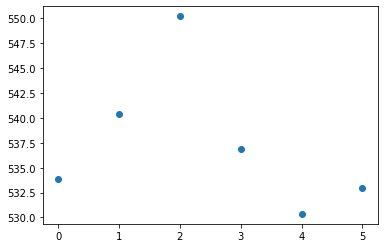

In [8]:
plotTrace()

In [22]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)

Trace actual size 1


In [32]:
dev.WriteCommand("SOUR:DCON:DELTa 1e-6")
dev.QueryCommand("SOUR:DCON:DELTa?")

'0.00000'

In [33]:
dev.QueryCommand(f"SOUR:DCON:STOP?")


'1.000000E-04'

In [41]:
dev.RunLinSweep(st=10e-6, en=100e-6, step=0.1e-6)

In [24]:
a="""*RST ‘ Restores 622x defaults.
SOUR:DCON:STARt 0 ‘ Sets start value to 0µA.
SOUR:DCON:STEP 10e-6 ‘ Sets step size to 10µA.
SOUR:DCON:STOP 50e-6 ‘ Sets stop value to 50µA.
SOUR:DCON:DELTa 20e-6 ‘ Sets delta value to 20µA.
SOUR:DCON:DELay 1e-3 ‘ Sets delay to 1ms.
SOUR:DCON:CAB ON ‘ Enables Compliance Abort.
TRAC:POIN 6 ‘ Sets buffer size to six points. A
SOUR:DCON:ARM ‘ Arms Differential Conductance.
INIT:IMM """

In [43]:
dev.WriteCommand("*RST")
dev.WriteCommand("SOUR:DCON:STARt 0 ")
dev.WriteCommand("SOUR:DCON:STEP 10e-6")
dev.WriteCommand("SOUR:DCON:STOP 50e-6")
dev.WriteCommand("SOUR:DCON:DELTa 20e-6 ")
dev.WriteCommand("SOUR:DCON:DELay 1e-3")
dev.WriteCommand("SOUR:DCON:CAB OFF")
dev.WriteCommand("TRAC:POIN 6")
dev.WriteCommand("SOUR:DCON:ARM")
dev.WriteCommand("INIT:IMM")

In [22]:
a

'*RST ‘ Restores 622x defaults.SOUR:DCON:STARt 0 ‘ Sets start value to 0µA.SOUR:DCON:STEP 10e-6 ‘ Sets step size to 10µA.SOUR:DCON:STOP 50e-6 ‘ Sets stop value to 50µA.SOUR:DCON:DELTa 20e-6 ‘ Sets delta value to 20µA.SOUR:DCON:DELay 1e-3 ‘ Sets delay to 1ms.SOUR:DCON:CAB ON ‘ Enables Compliance Abort.TRAC:POIN 6 ‘ Sets buffer size to six points. ASOUR:DCON:ARM ‘ Arms Differential Conductance.INIT:IMM '